# Data Science Fundamentals with Python

### 1. Project Setup & Imports

In [205]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, 
    classification_report, mean_squared_error, r2_score
)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

### 2. Data Loading

Dataset: UCI Heart Disease - Cleveland  
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [206]:
df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


##### Basic Structure

In [207]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.15841

### 3.1 EDA & Data Preprocessing

In [208]:
# Replace '?' with NaN and convert all columns to numeric
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

# Check for missing values
print(df.isnull().sum())

# Fill missing values with column median
df.fillna(df.median(numeric_only=True), inplace=True)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [209]:
# As 'num' is the target variable indicating presence of heart disease 0 = no disease, 1 = disease
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

# Split features and target variable
X = df.drop('num', axis=1)
y = df['num']

# Scale the features for better performance in PCA and clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

### 3.2 Heart Disease Prediction

In [210]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Logistic Regression
rf = RandomForestClassifier(max_depth=4, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [211]:
def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"Evaluation for {model_name}:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\nConfusion Matrix:")
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Greens')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

Evaluation for Logistic Regression:
Accuracy: 0.8688524590163934
Precision: 0.8125
Recall: 0.9285714285714286
F1 Score: 0.8666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


Confusion Matrix:


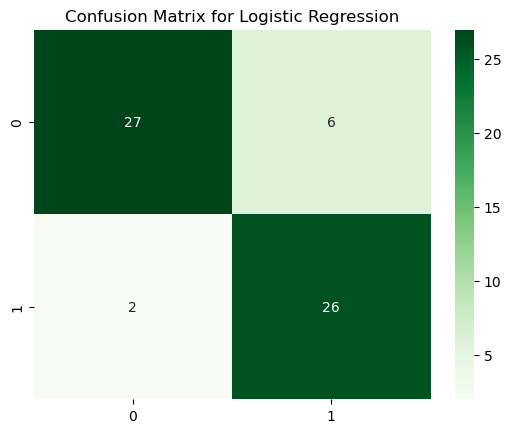

In [212]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

Evaluation for Random Forest Classifier:
Accuracy: 0.9016393442622951
Precision: 0.8928571428571429
Recall: 0.8928571428571429
F1 Score: 0.8928571428571429

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.89      0.89      0.89        28

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61


Confusion Matrix:


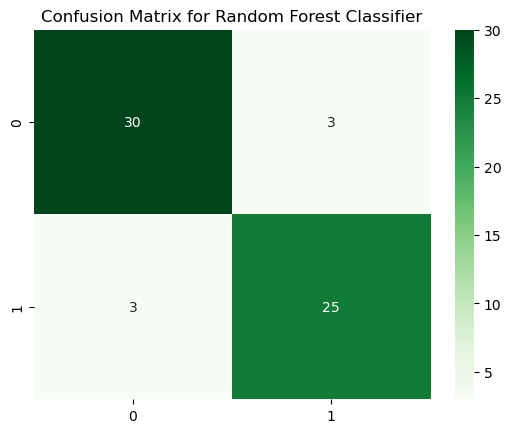

In [213]:
evaluate_model(y_test, y_pred_rf, "Random Forest Classifier")

### 3.3 Cholesterol Level Prediction

In [214]:
df_reg = df.drop(columns=['num'])

# Drop weakly correlated features. Keep features where |correlation with 'chol'| > 0.05
corr_with_chol = df_reg.corr()['chol'].drop('chol')
selected_features = corr_with_chol[abs(corr_with_chol) > 0.05].index.tolist()

# Ensure 'age' and 'trestbps' are included as they are important features
if 'age' not in selected_features:
    selected_features.append('age')
if 'trestbps' not in selected_features:
    selected_features.append('trestbps')

print("Selected features:", selected_features)

Selected features: ['age', 'sex', 'cp', 'trestbps', 'restecg', 'exang', 'ca']


#### Add interaction terms, example interaction terms based on domain knowledge

In [215]:
df_reg['age_trestbps'] = df_reg['age'] * df_reg['trestbps']
df_reg['cp_thalach'] = df_reg['cp'] * df_reg['thalach']
df_reg['oldpeak_slope'] = df_reg['oldpeak'] * df_reg['slope']

selected_features += ['age_trestbps', 'cp_thalach', 'oldpeak_slope']

#### Prepare the regression dataset

In [216]:
X = df_reg[selected_features]
y = df_reg['chol']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### Linear Regression and evaluation

Final Linear Regression Evaluation:
R² Score: 0.14842077878511384
Mean Squared Error: 3446.3390485380232


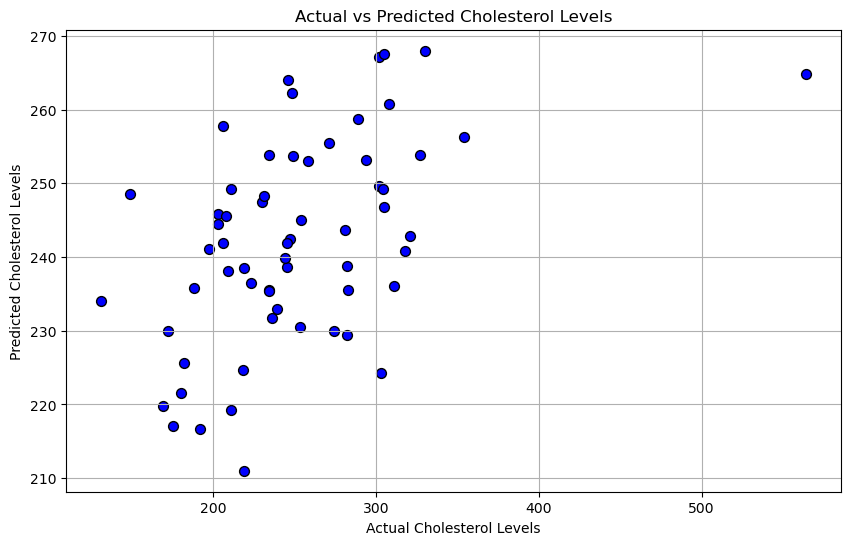

In [217]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Final Linear Regression Evaluation:")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=1.0, edgecolors='k', s=50, c='blue')
plt.xlabel('Actual Cholesterol Levels')
plt.ylabel('Predicted Cholesterol Levels')
plt.title('Actual vs Predicted Cholesterol Levels')
plt.grid(True)
plt.show()

#### Correlation matrix

In [218]:
corr_matrix = df.drop(columns='num').corr()
corr_with_chol = corr_matrix['chol'].sort_values(ascending=False)
print("Top features correlated with cholesterol:")
print(corr_with_chol)

Top features correlated with cholesterol:
chol        1.000000
age         0.208950
restecg     0.171043
trestbps    0.130120
ca          0.123726
cp          0.072319
exang       0.061310
oldpeak     0.046564
thal        0.018351
fbs         0.009841
thalach    -0.003432
slope      -0.004062
sex        -0.199915
Name: chol, dtype: float64


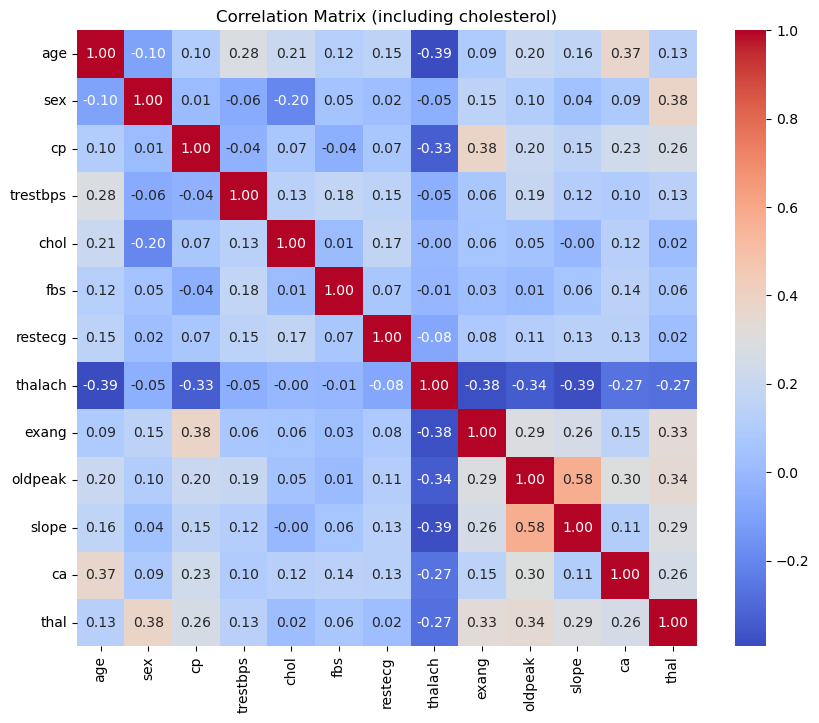

In [219]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix (including cholesterol)")
plt.show()

#### Interpretation

Despite several optimization techniques:

- The model achieved an R² of ~0.15, meaning it explained only 15% of the variation in cholesterol.  
- Even with polynomial interactions, the dataset’s features do not strongly correlate with chol.  
- This result reflects a realistic medical modeling scenario where key influencing variables (diet, genetics, medications, etc.) are missing from the dataset.

### 3.4 Principal Component Analysis

In [220]:
# Drop target columns for PCA
pca_df = df.copy()
pca_df['ca'] = pd.to_numeric(pca_df['ca'], errors='coerce')
pca_df['thal'] = pd.to_numeric(pca_df['thal'], errors='coerce')
pca_df = pca_df.drop(columns=['num', 'chol'])

In [221]:
# Using median for numeric columns to fill missing values
pca_df = pca_df.fillna(pca_df.median(numeric_only=True))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_df)

#### Apply PCA

In [222]:
# Using PCA to reduce dimensionality while retaining 90% of variance
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)

In [223]:
# PCA explained variance ratio
print("Explained variance ratio by each principal component:")
print(pca.explained_variance_ratio_)

Explained variance ratio by each principal component:
[0.2552113  0.12214114 0.10084364 0.0900921  0.07805551 0.07358612
 0.06859435 0.060211   0.04698116 0.0397333 ]


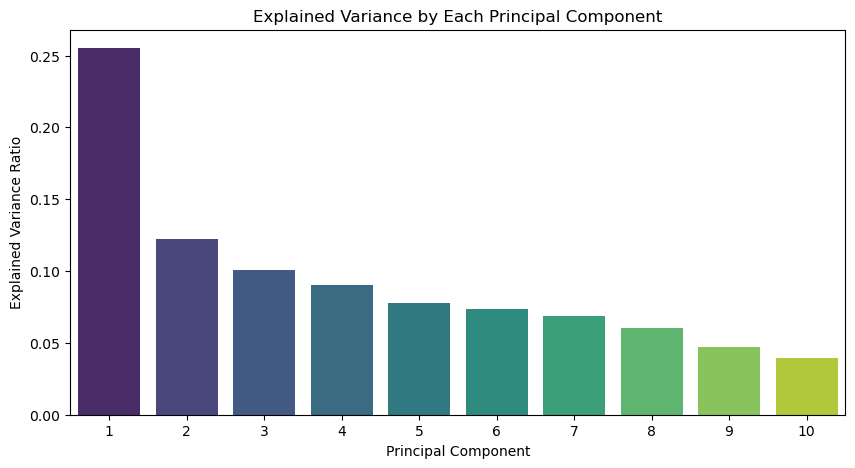

In [224]:
# Plotting the explained variance ratio
plt.figure(figsize=(10, 5))
sns.barplot(x=list(range(1, len(pca.explained_variance_ratio_)+1)), 
            y=pca.explained_variance_ratio_, palette="viridis")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.show()

In [225]:
# Show the shape of the PCA-reduced dataset
print("Shape of PCA-reduced dataset:", X_pca.shape)

Shape of PCA-reduced dataset: (303, 10)


### 3.5 Grouping Patients based on Health Profiles

#### Use the PCA-reduced data from previous task (X_pca)

In [226]:
# Elbow method to find optimal k
inertias = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_pca, kmeans.labels_))

#### Plot Elbow curve

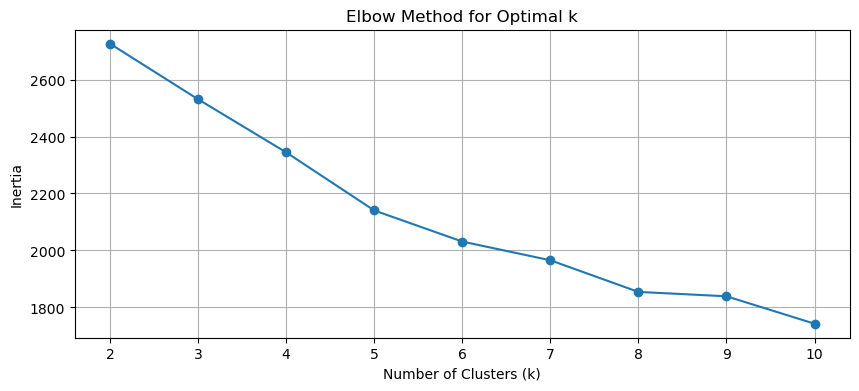

In [227]:
plt.figure(figsize=(10,4))
plt.plot(K, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

#### Plot Silhouette scores

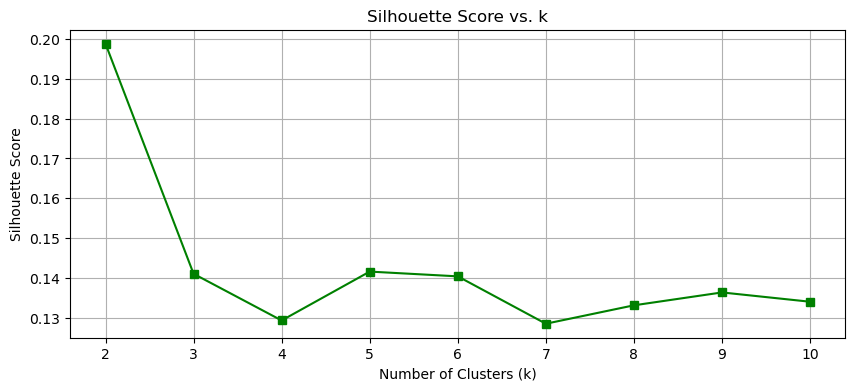

In [228]:
plt.figure(figsize=(10,4))
plt.plot(K, sil_scores, marker='s', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. k')
plt.grid(True)
plt.show()

#### Determine optimal k based on silhouette score

In [229]:
optimal_k = sil_scores.index(max(sil_scores)) + 2
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

Optimal number of clusters based on silhouette score: 2


#### Apply Final K-Means

In [230]:
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = final_kmeans.fit_predict(X_pca)

#### Visualize clusters in 2D (First 2 PCA Components)

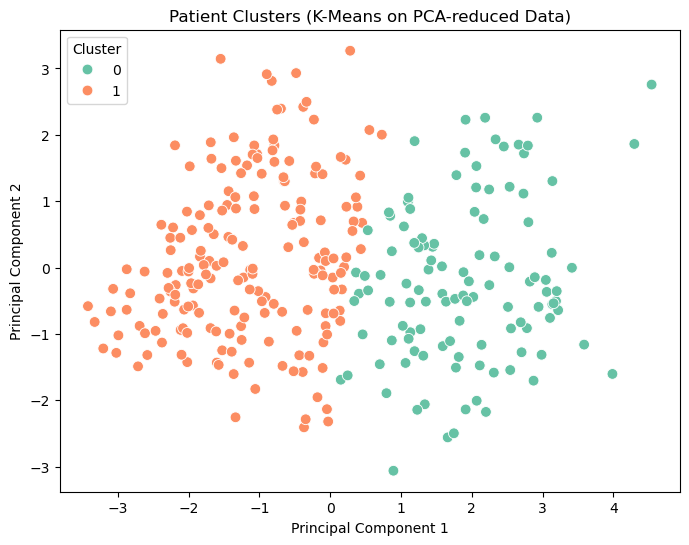

In [231]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=cluster_labels, palette='Set2', s=60)
plt.title('Patient Clusters (K-Means on PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()